CESI CDP - Rapport de projet
===

### Introduction

Notre équipe du CesiCDP est assignée à une mission d'optimisation: nous devons résoudre un problème de VRP (Vehicle Routing Problem) afin de pouvoir diriger les livraisons sur un parcours optimisé. Bien qu'il existe des outils open-source résolvant ce type de problème, le groupe CesiCDP nous a demandé de créer un outil sur mesure en langage python, et d'analyser ses performances.

### Sommaire

1. Modélisation du problème
    * Définition du problème
    * Étude de complexité
2. Présentation du choix et description de l'algorithme
    * Fonctionnement & paramètres
    * Spécificités ajoutées à l'algorithme
3. Illustration de cas de tests
4. Étude statistique
    * Statistiques descriptives et prédictives
    * Variation en fonction des paramètres
    * Analyse des résultats

## 1. Modélisation du problème

### Définition du problème

Il nous a été demandé de résoudre un problème de tournées de véhicule. Nous avons décidé que les sommets à visiter seronts définis par leurs coordonnées. Dans notre cas, nou devrons trouver des itinéraires pour effectuer des tournées de livraisons pour atteindre différentes villes sur un large territoire, nous admettons alors que le graphe est complet, et non orienté. Par ailleurs, la plupart des datasets de recherche utilisent les mêmes contraintes pour leurs implémentations d'algorithmes.
L'objectif est de passer une fois seulement par tous les sommets, et de revenir au point de départ, en minimisant la distance totale parcourue.

### Étude de complexité

Le problème du VRP est NP-Complet. Nous ne savons pas résoudre ce problème de façon optimale, c'est pour cela que nous allons utiliser une méta-heuristique: le recuit simulé.
Les problèmes NP-complets d'optimisation combinatoire sont caractérisés par une complexité exponentielle ou factorielle, par conséquent, il est impossible d'énumérer toutes les solutions possibles car cela dépasse la capacité de calcul de n'importe quel ordinateur. Il est donc très difficile de trouver la solution optimale.

Les méthodes approchées ou heuristiques présentent l'avantage d'un temps de calcul réduit mais ne donnent aucune information sur la qualité de la solution trouvée.
Pour résoudre des problèmes difficiles (par exemple ceux qui présentent de nombreux extrema locaux pauvres), des techniques ont été conçues pour déterminer des solutions qui ne sont pas rigoureusement optimales, mais qui s’en approchent. Ces méthodes se basent généralement sur des phénomènes physiques, biologiques, socio-psychologiques ou font appel au hasard. Les domaines d’application sont vastes et s’étendent souvent bien au-delà des problèmes pour lesquels elles ont été initialement conçues.

Les métaheuristiques sont le plus souvent des recherches locales modifiées pour éviter les minima locaux. Leur conception commence par l’étude d’une recherche locale classique (définition d’un voisinage, avec transformations simples), que l’on promeut ensuite en une méthode plus puissante si elle s’avère insuffisante. Il s’agit de méthodes très générales, dans lesquelles plusieurs composants doivent être précisés en fonction du problème à traiter.

## 2. Présentation du choix et description de l'algorithme

### Fonctionnement et paramètres

Le recuit simulé repose sur une analogie avec la métallurgie et le recuit des métaux : un métal refroidi trop vite présente de nombreux défauts qui correspondent à des excédents d'énergie interne. L'objectif du recuit est de minimiser ces excédents de façon à obtenir une configuration d'énergie minimale. Pour le réaliser, on réchauffe le métal ce qui a pour effet d'augmenter encore l'énergie interne, mais un réglage judicieux de la température de refroidissement permet de sortir de l'état initial et d'obtenir finalement une énergie interne plus faible. L'application de ce principe à l'optimisation est le suivant : Il est possible, contrairement à un algorithme de recherche locale, d'accepter une dégradation de la fonction objectif avec une certaine probabilité, sachant que cette dégradation pourra entraîner une amélioration ultérieurement.
Cette méthode d’optimisation s’appuie sur les travaux de Metropolis qui permettent de décrire l’évolution de l’équilibre thermodynamique d’un système.

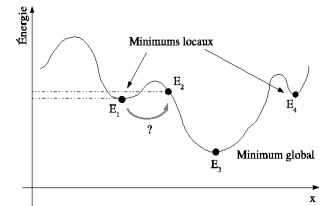

Dans l'algorithme de Metropolis, on part d'une configuration donnée, et on lui fait subir une modification aléatoire. Si cette modification fait diminuer la fonction objectif (ou énergie du système), elle est directement acceptée ; Sinon, elle n’est pas acceptée qu’avec une probabilité égale à `ΔE/T` (avec E : énergie, et T : température), cette règle est appelé critère de Metropolis. 

La température varie selon une fonction appelée "temperature schedule".

### Spécifités ajoutées à l'algorithme

Nous avons ajouté deux spécificités à l'algorithme du recuit simulé:

* Le réchaud

Une fois la température descendue proche de zéro, nous remontons la température afin d'éviter de trop tomber dans un extremum local. Nous ne remontons pas la température autant que la température initiale, mais suffisament pour être sûr de sortir d'un optimum local.

* Le multi-start

Nous générons plusieurs situations de départ, et gardons la meilleure dans le but de commencer avec une solution déjà proche d'une solution efficace.

* Sauvegarde du meilleur résultat

Nous vérifions à chaque itération que le nouveau cycle généré soit le plus petit. Dans ce cas, nous le gardons en mémoire et le retournons à la fin de l'éxecution de l'algorithme.

##